# Отчет №1.


1. Изучение данных, поиск аномалий в данных и их последующая коррекция.
2. Построение аналитической отчестности по данным.
3. Визуализация данных

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 40
pd.options.display.max_rows = 85

In [2]:
import glob

path = r'./data' # path to data directory
all_files = glob.glob(path + '/!*.csv') 

files_data = []

for file in all_files:
    data = pd.read_csv(file, encoding='cp1251', engine='python', sep=';', index_col=None, header=0)
    files_data.append(data)

order_data = pd.concat(files_data, axis=0, ignore_index=True)

In [3]:
order_data.head(5)

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.09.2017 11:34,08.09.2017 0:00,5412440_TR,Отменен,2 614,150,Курьерская,Наличная,Москва,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,150,150,NaN,9,2 017,NaN,Отменен,Москва,NaN,150,150,1,1,31.08.2017 0:00,55574851-49485350505178,103117_gu12@mail.ru,Валентина,ID10022107250,0,NaN
1,01.09.2017 11:34,08.09.2017 0:00,5412440_TR,Отменен,2 614,150,Курьерская,Наличная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,наборы игровые,ИГРУШКИ,"PLAYSKOOL, ИГРУШКА Музыкальный замок Пони",МГТ,Да,2.1 Не устроила дата доставки,1,1 382,1 382,1 974,9,2 017,NaN,Отменен,Москва,-592,150,150,2,1,31.08.2017 0:00,55574851-49485350505178,103117_gu12@mail.ru,Валентина,IDL00021467250,0,NaN
2,01.09.2017 11:34,08.09.2017 0:00,5412440_TR,Отменен,2 614,150,Курьерская,Наличная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,наборы игровые,ИГРУШКИ,"MY LITTLE PONY, НАБОР игровой Поезд Дружбы",МГТ,Да,2.1 Не устроила дата доставки,1,843,843,"1 685,20",9,2 017,NaN,Отменен,Москва,"-842,2",150,150,1,1,31.08.2017 0:00,55574851-49485350505178,103117_gu12@mail.ru,Валентина,IDL00036071149,0,NaN
3,01.09.2017 11:34,08.09.2017 0:00,5412440_TR,Отменен,2 614,150,Курьерская,Наличная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"УМКА , ЧАСЫ Фиксики, с проекцией",МГТ,Да,2.1 Не устроила дата доставки,1,239,239,"154,98",9,2 017,NaN,Отменен,Москва,"84,02",150,150,3,1,31.08.2017 0:00,55574851-49485350505178,103117_gu12@mail.ru,Валентина,IDL00038944553,0,NaN
4,01.09.2017 0:05,11.09.2017 0:00,5412441_TR,Возврат из ПВЗ,4 563,4 563,Магазины,Безналичная,Санкт-Петербург,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,99,99,NaN,9,2 017,901000646,Возврат,Регионы,NaN,99,99,1,1,31.08.2017 0:00,55575049-55525257485770,106117_ju17@mail.ru,Гость,ID10022107250,0,NaN


In [4]:
order_data.shape

(1673267, 38)

## Исследование и коррекция данных

Посмотрим на тип данных в каждой колонке:

In [5]:
order_data.dtypes

Дата                        object
ДатаДоставки                object
НомерЗаказаНаСайте          object
НовыйСтатус                 object
СуммаЗаказаНаСайте          object
СуммаДокумента              object
МетодДоставки               object
ФормаОплаты                 object
Регион                      object
Группа2                     object
Группа3                     object
Группа4                     object
Тип                         object
Номенклатура                object
ТипТовара                   object
Отменено                    object
ПричинаОтмены               object
Количество                   int64
Цена                        object
СуммаСтроки                 object
ЦенаЗакупки                 object
МесяцДатыЗаказа              int64
ГодДатыЗаказа               object
ПВЗ_код                     object
Статус                      object
Гео                         object
Маржа                       object
СуммаУслуг                  object
СуммаДоставки       

Следующие показатели должны быть числовыми:

* СуммаЗаказаНаСайте
* СуммаДокумента 
* Количество
* Цена 
* СуммаСтроки
* ЦенаЗакупки
* Маржа 
* СуммаУслуг
* СуммаДоставки
* КоличествоПроданоКлиенту

Следовательно, сразу обратим внимание, что **необходимо изменить типы некоторых колонок**:

'Дата', 'ДатаЗаказаНаСайте' -> `datetime` 

'СуммаЗаказаНаСайте', 'СуммаДокумента', 'Маржа' -> `float`

'Цена', 'СуммаСтроки', 'ЦенаЗакупки' -> `float`

Посмотрим на количество пропущенных значений в каждой колонке:

In [6]:
order_data.isna().sum()

Дата                              0
ДатаДоставки                   1230
НомерЗаказаНаСайте                0
НовыйСтатус                       0
СуммаЗаказаНаСайте                0
СуммаДокумента                    0
МетодДоставки                   114
ФормаОплаты                     116
Регион                         9845
Группа2                      325123
Группа3                      325123
Группа4                      381269
Тип                               0
Номенклатура                      0
ТипТовара                    325123
Отменено                          0
ПричинаОтмены               1509914
Количество                        0
Цена                              0
СуммаСтроки                       0
ЦенаЗакупки                  329966
МесяцДатыЗаказа                   0
ГодДатыЗаказа                     0
ПВЗ_код                      442742
Статус                            0
Гео                               0
Маржа                        329966
СуммаУслуг                  

Значительное количество пропусков в следующих колонках:

- 'ПричинаОтмены' – логично указывается далеко не всегда + не все транзакции отменяются.
- 'МагазинЗаказа' – пропуски практически во всех строчках, бесполезная колонка.
- 'Группа2', 'Группа3', 'ТипТовара' – имеют одинаковое число пропусков, причем их довольно много.
- 'Группа4' – пропусков чуть больше, но порядок величины тот же.
- 'ПВЗ_код' – код пункта выыдачи заказа, не особо важен для анализа, технический показатель.
- 'ЦенаЗакупки' и 'Маржа' – важные колонки, также имеют одинаковое число пропусков.

Посмотрим на 'СуммаЗаказаНаСайте' и 'СуммаДокумента'. По логике они должны быть равны, так как обозначают одно и тоже.

In [7]:
order_data[order_data['СуммаЗаказаНаСайте'] != order_data['СуммаДокумента']].shape[0]

506503

Можем заметить, что строк, в которых 'СуммаЗаказаНаСайте' != 'СуммаДокумента', много, поэтому, чтобы не разбираться с каждым случаем отдельно, удалим данные колонки и пересчитаем их, если понадобится.

Соотвественно, при дальнейшем анализе будем считать, что 'Цена', 'ЦенаЗакупки', 'Количество' и 'КоличествоПроданоКлиенту' приходят к нам без ошибок (строчки где эти данные пропущены мы удалим) и все основные показатели будем пересчитывать через них.

In [8]:
order_data[order_data['Номенклатура'] == 'Доставка']

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.09.2017 11:34,08.09.2017 0:00,5412440_TR,Отменен,2 614,150,Курьерская,Наличная,Москва,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,150,150,NaN,9,2 017,NaN,Отменен,Москва,NaN,150,150,1,1,31.08.2017 0:00,55574851-49485350505178,103117_gu12@mail.ru,Валентина,ID10022107250,0,NaN
4,01.09.2017 0:05,11.09.2017 0:00,5412441_TR,Возврат из ПВЗ,4 563,4 563,Магазины,Безналичная,Санкт-Петербург,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,99,99,NaN,9,2 017,901000646,Возврат,Регионы,NaN,99,99,1,1,31.08.2017 0:00,55575049-55525257485770,106117_ju17@mail.ru,Гость,ID10022107250,0,NaN
8,01.09.2017 0:05,07.09.2017 0:00,5412447_TR,Доставлен,4 429,4 429,Магазины,Безналичная,Санкт-Петербург,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,99,99,NaN,9,2 017,901000646,Доставлен,Регионы,NaN,99,99,1,1,31.08.2017 0:00,55574848-54535352485178,109117_mu21@mail.ru,Гость,ID10022107250,0,NaN
9,01.09.2017 0:05,14.09.2017 0:00,5413163_TR,Отменен,880,99,Магазины,Безналичная,Волгоград,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,99,99,NaN,9,2 017,23111,Отменен,Регионы,NaN,99,99,1,1,31.08.2017 0:00,55575055-48545053555072,98117_bu24@bk.ru,Анастасия,ID10022107250,0,NaN
13,01.09.2017 0:05,18.09.2017 0:00,5413168_TR,Возврат из ПВЗ,5 502,5 502,Магазины,Безналичная,Клин (Клинский район),NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,49,49,NaN,9,2 017,GL0285876,Возврат,МО,NaN,49,49,1,1,31.08.2017 0:00,55574851-57545150485270,guest_103117_gu28@workmail.ru,Гость,ID10022107250,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673249,31.08.2017 23:42,05.09.2017 0:00,5413132_TR,Отменяется,3 662,3 991,Курьерская,Наличная,Москва,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,150,150,NaN,8,2 017,NaN,Не определен,Москва,NaN,150,150,1,1,31.08.2017 0:00,55574954-52495653575371,102117_fu13@mail.ru,Гость,ID10022107250,0,NaN
1673253,31.08.2017 23:42,04.09.2017 0:00,5413144_TR,Возврат из ПВЗ,1 719,1 719,Магазины,Безналичная,Москва,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,49,49,NaN,8,2 017,23111,Возврат,Москва,NaN,49,49,1,1,31.08.2017 0:00,55574957-49485052555076,107117_ku20@yandex.ru,Гость,ID10022107250,0,NaN
1673254,31.08.2017 23:42,09.09.2017 0:00,5413150_TR,Возврат из ПВЗ,1 769,1 769,Магазины,Безналичная,Казань,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,99,99,NaN,8,2 017,23111,Возврат,Регионы,NaN,99,99,1,1,31.08.2017 0:00,55575655-50555455535477,110117_nu14@mail.ru,Рим,ID10022107250,0,NaN
1673256,31.08.2017 23:42,06.09.2017 0:00,5413156_TR,Отменен,3 469,49,Магазины,Безналичная,Москва,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,49,49,NaN,8,2 017,23111,Отменен,Москва,NaN,49,49,1,1,31.08.2017 0:00,55575653-52535256565477,109117_mu13@bk.ru,Гость,ID10022107250,0,NaN


**Разберемся с доставкой**. Как мы видим у доставки 'Тип' == ИНОЕ (заметим, что только у доставки 'Тип' == ИНОЕ) и пропущена 'ЦенаЗакупки'. Так как непонятно, какая маржа у доставки (цена или 0), то во избежание двоякой трактовки мы исключим доставку из общего анализа (при расчете среднего чека и т.д.) и позже проанализируем данный тип отдельно.

In [9]:
order_data[order_data['ЦенаЗакупки'].isna()].groupby('Тип')['Дата'].count()

Тип
ИГРУШКИ      1180
ИНОЕ       325570
КГТ           314
ОДЕЖДА       1996
ППКП          906
Name: Дата, dtype: int64

После вышеизложенного исследования данных ясно, что нужно делать по отчистке и подготовке данных:

* Преобразовать колонки к правильному типу данных
* Удалить все строчки, в которых 'Номенклатура' == 'Доставка'
* Удалить все чеки, которые содержат строчки, в которых пропущены значения в колонке 'ЦенаЗакупки' / 'Маржа'
* Пересчитать колонки 'Маржа' и 'СуммаСтроки'
* Удалить колонки 'СуммаЗаказаНаСайте', 'СуммаДокумента', чтобы избежать неправильной трактовки в дальнейшем
* Исключить технические и бесполезные показатели из рассмотрения
* Заполнить пропуски в колонках

In [13]:
row_num = order_data.shape[0]
order_data = order_data[order_data['Номенклатура'] != 'Доставка']

rows_deleted = row_num - order_data.shape[0]
rows_deleted_percent = rows_deleted / order_data.shape[0] * 100
print(f'Количество удаленных строк, которые описывают доставку = {rows_deleted} ({rows_deleted_percent:.2f}%)')

Количество удаленных строк, которые описывают доставку = 325123 (24.12%)


In [14]:
row_num = order_data.shape[0]
drop_data = order_data[order_data['ЦенаЗакупки'].isna()]
drop_receipts = drop_data['НомерЗаказаНаСайте'].unique()
order_data = order_data[~order_data['НомерЗаказаНаСайте'].isin(drop_receipts)]

rows_deleted = row_num - order_data.shape[0]
rows_deleted_percent = rows_deleted / order_data.shape[0] * 100
print(
    f'Количество удаленных строк при работе с пропущенными значениями = {rows_deleted} ({rows_deleted_percent:.2f}%)',
    f'Количество удаленных чеков при работе с пропущенными значениями = {len(drop_receipts)}', sep='\n'
)

Количество удаленных строк при работе с пропущенными значениями = 36570 (2.79%)
Количество удаленных чеков при работе с пропущенными значениями = 4090


In [15]:
def object_to_float_columns(data, column_names):
    for column_name in column_names:
        data[column_name] = data[column_name].apply(lambda x : x.replace(',', '.'))
        data[column_name] = data[column_name].apply(lambda x : x.replace(' ', ''))
        data[column_name] = pd.to_numeric(data[column_name])    
    return data

In [16]:
### Converting data types of desired columns ###

order_data = object_to_float_columns(
    order_data, ['СуммаДокумента', 'СуммаЗаказаНаСайте', 'СуммаСтроки', 'ЦенаЗакупки', 'Цена']
)

order_data['Дата'] = pd.to_datetime(order_data['Дата'], format='%d.%m.%Y %H:%M')
order_data['ДатаДоставки'] = pd.to_datetime(order_data['ДатаДоставки'], format='%d.%m.%Y %H:%M')
order_data['ДатаЗаказаНаСайте'] = pd.to_datetime(order_data['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M')
order_data['ДеньДатыЗаказа'] = order_data['Дата'].dt.dayofweek + 1
order_data['ЧасДатыЗаказа'] = order_data['Дата'].dt.hour

In [17]:
### Recalculating basic numerical indicators ###

order_data['СуммаСтроки'] = order_data['Цена'] * order_data['Количество']
order_data['Маржа'] = (order_data['Цена'] - order_data['ЦенаЗакупки']) * order_data['Количество']

**Удаляем чеки**, которые содержат пропуски в ключевых колонках:

In [18]:
blank_region_data = order_data[order_data['Регион'].isna()]
blank_region_receipts = blank_region_data['НомерЗаказаНаСайте'].unique()

row_num = order_data.shape[0]
order_data = order_data[~order_data['НомерЗаказаНаСайте'].isin(blank_region_receipts)]
rows_deleted = row_num - order_data.shape[0]
rows_deleted_percent = rows_deleted / order_data.shape[0] * 100
print(
    f'Количество удаленных строк при работе с пропущенными регионами = {rows_deleted} ({rows_deleted_percent:.2f}%)',
    f'Количество удаленных чеков при работе с пропущенными регионами = {len(blank_region_receipts)}', sep='\n'
)

blank_phone_data = order_data[order_data['Телефон_new'] == '0']
blank_phone_receipts = blank_phone_data['НомерЗаказаНаСайте'].unique()

row_num = order_data.shape[0]
order_data = order_data[~order_data['НомерЗаказаНаСайте'].isin(blank_phone_receipts)]
rows_deleted = row_num - order_data.shape[0]
rows_deleted_percent = rows_deleted / order_data.shape[0] * 100
print(
    f'Количество удаленных строк при работе с пропущенными телефонами = {rows_deleted} ({rows_deleted_percent:.2f}%)',
    f'Количество удаленных чеков при работе с пропущенными телефонами = {len(blank_phone_receipts)}', sep='\n'
)

Количество удаленных строк при работе с пропущенными регионами = 9641 (0.74%)
Количество удаленных чеков при работе с пропущенными регионами = 7933
Количество удаленных строк при работе с пропущенными телефонами = 3204 (0.25%)
Количество удаленных чеков при работе с пропущенными телефонами = 868


**Заменяем пропуски** в тех показателях, которые нам будут нужны в дальнейшем:

In [19]:
order_data.loc[order_data['ПричинаОтмены'].isna(), 'ПричинаОтмены'] = 'Нет данных'
order_data.loc[order_data['ЭлектроннаяПочта_new'].isna(), 'ЭлектроннаяПочта_new'] = 'Нет данных'

**Удаляем ненужные и чисто технические показатели**, которые вряд ли будут полезны при последующем анализе:

In [20]:
order_data = order_data.drop(columns=[
    'Дата', 'ДатаДоставки', 'ПВЗ_код',
    'НомерСтроки', 'МагазинЗаказа', 'ГородМагазина', 'Клиент',
    'ID_SKU', 'ГодДатыЗаказа', 'СуммаЗаказаНаСайте', 'СуммаДокумента', 'Группа4'
])

Как мы видим, пропусков не осталось и **данные отчищены от пропусков**:

In [21]:
order_data.isna().sum()

НомерЗаказаНаСайте          0
НовыйСтатус                 0
МетодДоставки               0
ФормаОплаты                 0
Регион                      0
Группа2                     0
Группа3                     0
Тип                         0
Номенклатура                0
ТипТовара                   0
Отменено                    0
ПричинаОтмены               0
Количество                  0
Цена                        0
СуммаСтроки                 0
ЦенаЗакупки                 0
МесяцДатыЗаказа             0
Статус                      0
Гео                         0
Маржа                       0
СуммаУслуг                  0
СуммаДоставки               0
КоличествоПроданоКлиенту    0
ДатаЗаказаНаСайте           0
Телефон_new                 0
ЭлектроннаяПочта_new        0
ДеньДатыЗаказа              0
ЧасДатыЗаказа               0
dtype: int64

Посмотрим на распределения значений в числовых показателях, чтобы **выявить аномалии в данных**:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Функция, которая строит график распределения значений сразу в нескольких колонках

def build_displots_without_nan(data, columns, n_col=1, name='displots'):
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(20, 16))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        cur_data = data[~data[columns[0]].isna()][columns[0]]
        try:
            try:
                sns_plot = sns.distplot(cur_data, ax=ax, color='blue')
            except:
                sns_plot = sns.distplot(cur_data, ax=ax, color='red', kde_kws={'bw': 0.1})
        except:
            sns_plot = cur_data.hist(ax=axes[0], color='green')
        ax.set_title(columns[0])
        plt.show()
    elif n_col >= len(columns):
        fig, axes = plt.subplots(1, n_col, figsize=(20, 16 // n_col))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[idx], color='green')
            axes[idx].set_title(columns[idx])
        plt.show()
    else:
        m = n_col
        n = (len(columns) + m - 1) // m
        fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            i, j = idx // m, idx % m
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[i, j], color='green')
            axes[i, j].set_title(columns[idx])
        plt.show()
    return

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

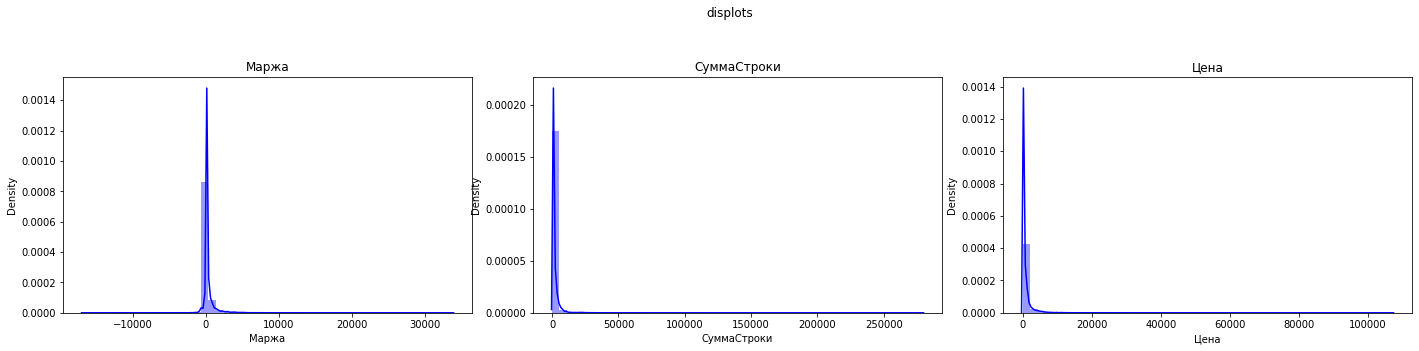

In [26]:
build_displots_without_nan(order_data, ['Маржа', 'СуммаСтроки', 'Цена'], 3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

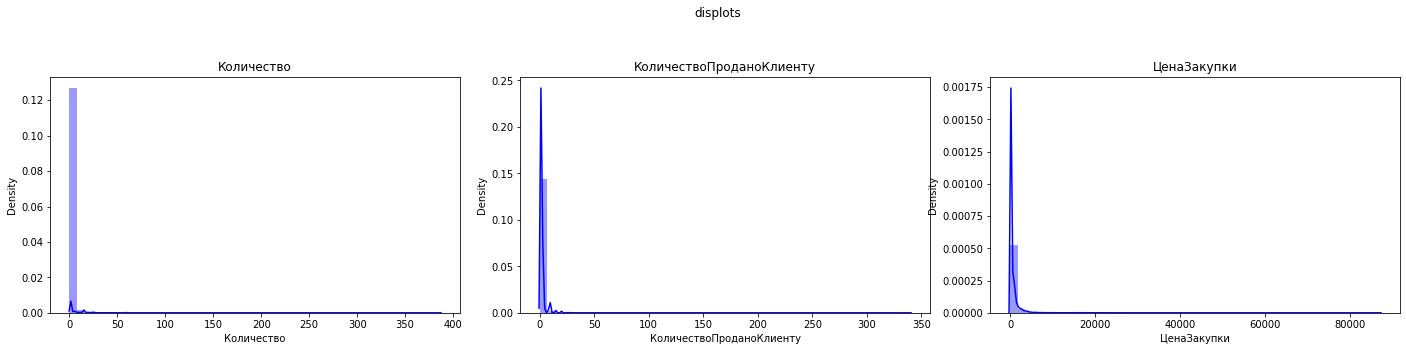

In [29]:
build_displots_without_nan(order_data, ['Количество', 'КоличествоПроданоКлиенту', 'ЦенаЗакупки'], 3)

1) Заметим, что есть транзакции, у которых большая отрицательная маржа. С таких транзакций магазин теряет деньги, это так называемые **фрод-транзакции**, от них необходимо избавиться, потому что они будут сильно влиять на прогноз наших моделей.

2) Во всех распределениях есть длинные положительные хвосты, необходимо дополнительное исследование, чтобы исключить выбросы.

In [40]:
order_data[order_data['Цена'] > np.percentile(order_data['Цена'], 99.999)]

,НомерЗаказаНаСайте,НовыйСтатус,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,ДеньДатыЗаказа,ЧасДатыЗаказа
72678,5437534_TR,Отменен,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,107000.0,107000.0,85700.0,9,Отменен,Москва,21300.0,149,149,1,2017-09-07,55574851-52525056524979,109117_mu23@mail.ru,4,18
198879,5499979_ES,Возврат из ПВЗ,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",КГТ,"BAMBOLINA, КРОВАТЬ-колыбель Perla, (бел)",КГТ,Нет,Нет данных,1,81480.0,81480.0,59750.0,9,Возврат,Москва,21730.0,0,0,0,2017-09-17,55575054-49495651564870,109117_mu17@mail.ru,7,10
312708,5578391_TR,Отменен,Магазины,Безналичная,Королев (Московская область район),КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,"1.1 Тест, контрольная закупка",1,107000.0,107000.0,85700.0,9,Отменен,МО,21300.0,49,49,1,2017-09-25,55575348-50544848574878,108117_lu14@mail.ru,1,17
975552,5088128_TR,Отменен,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,Авто корректировка ЗПЗ,0,107000.0,0.0,85700.0,7,Отменен,Москва,0.0,49,49,0,2017-07-09,55575051-54495648545479,109117_mu23@yandex.ru,7,19
975569,5088164_TR,Отменен,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,107000.0,107000.0,85700.0,7,Отменен,Москва,21300.0,49,49,1,2017-07-09,55575051-54495648545479,109117_mu23@yandex.ru,7,19
991405,5095715_TR,Отменен,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. e...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,79200.0,79200.0,63350.0,7,Отменен,Москва,15850.0,49,49,1,2017-07-11,55575051-54495648545479,109117_mu23@yandex.ru,2,9
1015241,5111447_TR,Отменен,Магазины,Безналичная,Королев (Московская область район),КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,107000.0,107000.0,85700.0,7,Отменен,МО,21300.0,49,49,1,2017-07-12,55574852-51555248554977,108117_lu21@mail.ru,3,14
1135804,5166735_TR,Отменен,DPD,Безналичная,Благовещенск,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ,"DJI, КВАДРОКОПТЕР радиоуправляемый Mavic Combo...",МГТ,Да,Авто корректировка ЗПЗ,0,95589.0,0.0,86900.0,7,Отменен,Регионы,0.0,650,650,0,2017-07-21,55574952-51564855555677,102117_fu18@mail.ru,5,16
1291695,5226152_TR,Возврат из ПВЗ,Магазины,Безналичная,Санкт-Петербург,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. e...",КГТ,Нет,Нет данных,1,79200.0,79200.0,63350.0,8,Возврат,Регионы,15850.0,99,99,0,2017-08-03,55575051-54495648545479,109117_mu23@yandex.ru,4,16
1334283,5248496_TR,Отменен,DPD,Безналичная,Екатеринбург,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ,"DJI, КВАДРОКОПТЕР радиоуправляемый Mavic Combo...",МГТ,Да,4.01 Нет на остатках или нет в обработке ЗПЗ,1,95589.0,95589.0,86900.0,8,Отменен,Регионы,8689.0,750,750,1,2017-08-07,55574853-56485355535173,100117_du23@yandex.ru,1,16


In [41]:
order_data[order_data['Количество'] > np.percentile(order_data['Количество'], 99.999)]

,НомерЗаказаНаСайте,НовыйСтатус,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,ДеньДатыЗаказа,ЧасДатыЗаказа
370647,5619505_TR,Возврат из ПВЗ,Магазины,Безналичная,Липецк,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,"ERICH KRAUSE, ТЕТРАДЬ (12 л) в кос.лин. Класси...",МГТ,Нет,Нет данных,340,8.0,2720.0,7.15,9,Возврат,Регионы,289.00,99,99,340,2017-09-29,55574953-53535351524971,Нет данных,5,12
402427,5644949_TR,В резерве,Курьерская,Наличная,Москва,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,"ERICH KRAUSE, ПЛАСТИЛИН мягкий, белый, (20 г)",МГТ,Нет,Нет данных,300,8.0,2400.0,4.95,10,В процессе,Москва,915.00,150,150,300,2017-10-01,55575053-56515651495178,107117_ku14@mail.ru,7,23
442343,5672401_TR,К отгрузке,DPD,Безналичная,Санкт-Петербург,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА ГИГИЕНЫ,ППКП,"MADITOL ANTISEPTIC, САЛФЕТКИ влажные, антибакт...",МГТ,Нет,Нет данных,300,20.0,6000.0,18.77,10,Доставлен,Регионы,369.00,380,380,300,2017-10-04,55575049-52484956505171,97117_au14@lysoform.ru,3,16
454436,5680521_TR,Доставлен,Магазины,Безналичная,Санкт-Петербург,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,"ERICH KRAUSE, ПЛАСТИЛИН мягкий, светло-зеленый...",МГТ,Нет,Нет данных,250,3.0,750.0,1.65,10,Доставлен,Регионы,337.50,99,99,250,2017-10-05,55575149-50515455514879,107117_ku28@rambler.ru,4,12
574228,5768855_TR,Принят в ПВЗ,Магазины,Безналичная,Санкт-Петербург,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,"PILOT, РУЧКА шар. автомат.Rex Grip, (син)",МГТ,Нет,Нет данных,185,75.0,13875.0,53.23,10,В процессе,Регионы,4027.45,99,99,185,2017-10-12,55575450-54565448545375,101117_eu18@inbox.ru,4,14
1040487,5124387_TR,Возврат из ПВЗ,Магазины,Безналичная,Ростов-на-Дону,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,"ACTION, ТЕТРАДЬ в кл. (12 л), (А5), (в асс)",МГТ,Нет,Нет данных,200,6.0,1200.0,4.50,7,Возврат,Регионы,300.00,99,99,0,2017-07-14,55575350-54484950514870,108117_lu15@ya.ru,5,11
1151809,5172916_TR,Отменен,DPD,Безналичная,Иваново,ИГРУШКИ,КОНСТРУКТОРЫ,ИГРУШКИ,"LEGO Classic, КОНСТРУКТОР НАБОР деталей для т...",МГТ,Да,5.3 Другое,200,1398.0,279600.0,1331.17,7,Отменен,Регионы,13366.00,600,600,200,2017-07-22,55574948-54565357575374,111117_ou23@rambler.ru,6,23
1383125,5272639_TR,Отменяется,Курьерская,Наличная,Москва,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,ППКП,"БАБУШКИНО ЛУКОШКО, ПЮРЕ говядина, (100г)",МГТ,Нет,Нет данных,198,57.0,11286.0,52.64,8,Не определен,Москва,863.28,150,150,198,2017-08-10,55525757-57545452535272,Нет данных,4,13
1397097,5279113_TR,К отгрузке,Курьерская,Наличная,Москва,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,ППКП,"БАБУШКИНО ЛУКОШКО, ПЮРЕ говядина, (100г)",МГТ,Нет,Нет данных,300,57.0,17100.0,52.64,8,Доставлен,Москва,1308.00,150,150,300,2017-08-11,55525757-57545452535272,3232_ 1@,5,10
1430784,5296267_TR,Возврат из ПВЗ,Магазины,Безналичная,Москва,ИГРУШКИ,КОНСТРУКТОРЫ,ИГРУШКИ,"LEGO, МИНИФИГУРКИ фильм Ниндзяго",МГТ,Нет,Нет данных,387,129.0,49923.0,132.96,8,Возврат,Москва,-1532.52,49,49,103,2017-08-14,55574853-55525050555470,Нет данных,1,19


In [58]:
order_data[order_data['СуммаСтроки'] > np.percentile(order_data['СуммаСтроки'], 99.999)]

,НомерЗаказаНаСайте,НовыйСтатус,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,ДеньДатыЗаказа,ЧасДатыЗаказа
72678,5437534_TR,Отменен,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,107000.0,107000.0,85700.00,9,Отменен,Москва,21300.0,149,149,1,2017-09-07,55574851-52525056524979,109117_mu23@mail.ru,4,18
312708,5578391_TR,Отменен,Магазины,Безналичная,Королев (Московская область район),КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,"1.1 Тест, контрольная закупка",1,107000.0,107000.0,85700.00,9,Отменен,МО,21300.0,49,49,1,2017-09-25,55575348-50544848574878,108117_lu14@mail.ru,1,17
621226,5811106_TR,Отменен,Транспортная компания,Безналичная,Новосибирск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИГРУШКИ,"B KIDS, КОМПЛЕКС развивающий Смотри, как я расту",МГТ,Да,"1.1 Тест, контрольная закупка",20,5199.0,103980.0,4529.00,10,Отменен,Регионы,13400.0,0,0,20,2017-10-16,55574851-57515155555079,115117_su15@kidstar.su,1,14
975569,5088164_TR,Отменен,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,107000.0,107000.0,85700.00,7,Отменен,Москва,21300.0,49,49,1,2017-07-09,55575051-54495648545479,109117_mu23@yandex.ru,7,19
1015241,5111447_TR,Отменен,Магазины,Безналичная,Королев (Московская область район),КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КГТ,"CONCORD, КОЛЯСКА 3 в 1 Neo Mobility Set S.E. I...",КГТ,Да,1.3 Не верные контактные данные или нет связи ...,1,107000.0,107000.0,85700.00,7,Отменен,МО,21300.0,49,49,1,2017-07-12,55574852-51555248554977,108117_lu21@mail.ru,3,14
1151809,5172916_TR,Отменен,DPD,Безналичная,Иваново,ИГРУШКИ,КОНСТРУКТОРЫ,ИГРУШКИ,"LEGO Classic, КОНСТРУКТОР НАБОР деталей для т...",МГТ,Да,5.3 Другое,200,1398.0,279600.0,1331.17,7,Отменен,Регионы,13366.0,600,600,200,2017-07-22,55574948-54565357575374,111117_ou23@rambler.ru,6,23
1244805,5208241_TR,К отгрузке,DPD,Безналичная,Иваново,ИГРУШКИ,КОНСТРУКТОРЫ,ИГРУШКИ,"LEGO Classic, КОНСТРУКТОР Набор кубиков для св...",МГТ,Нет,Нет данных,110,1398.0,153780.0,1331.17,7,Доставлен,Регионы,7351.3,350,350,110,2017-07-31,55575048-54555048485775,32121_ y25@altexcompany,1,13
1244806,5208241_TR,К отгрузке,DPD,Безналичная,Иваново,ИГРУШКИ,КОНСТРУКТОРЫ,ИГРУШКИ,"LEGO Classic, КОНСТРУКТОР Набор кубиков для св...",МГТ,Нет,Нет данных,110,1398.0,153780.0,1331.17,7,Доставлен,Регионы,7351.3,350,350,110,2017-07-31,55575048-54555048485775,32121_ y25@altexcompany,1,13
1334283,5248496_TR,Отменен,DPD,Безналичная,Екатеринбург,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ,"DJI, КВАДРОКОПТЕР радиоуправляемый Mavic Combo...",МГТ,Да,4.01 Нет на остатках или нет в обработке ЗПЗ,1,95589.0,95589.0,86900.00,8,Отменен,Регионы,8689.0,750,750,1,2017-08-07,55574853-56485355535173,100117_du23@yandex.ru,1,16
1602188,5381885_TR,Отменен,Магазины,Безналичная,Санкт-Петербург,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ,"PAREMO, ДОМ кукольный 3-этажный, с мебелью, с ...",МГТ,Да,"1.4 Ошибка выбора, будет новый заказ",9,11569.0,104121.0,8259.00,8,Отменен,Регионы,29790.0,99,99,0,2017-08-25,55575448-50535355524873,guest_103117_gu28@workmail.ru,5,20


Анализ показывает, что большие значения в 'Количество' не являются выбросами, так как покупались многоштучные товары.
В колонке 'Цена' это в основном крупногабаритные товары, стоимость которых действительно большая.

Перейдем к детекции фрода. Как уже отмечалось, нас интересуют транзакции с большой отрицательной маржой. Было решено отнести к фроду те транзакции, у которых значение маржи меньше, чем у 90% людей с отрицательной маржой.

In [72]:
### Dealing with fraud transactions ###

FRAUD_PERCENT = 10
threshold = np.percentile(order_data.loc[order_data['Маржа'] < 0, 'Маржа'], FRAUD_PERCENT)

fraud_data = order_data[(order_data['Маржа'] <= threshold)]
fraud_receipts = fraud_data['НомерЗаказаНаСайте'].unique()

row_num = order_data.shape[0]
order_data = order_data[~order_data['НомерЗаказаНаСайте'].isin(fraud_receipts)]
rows_deleted = row_num - order_data.shape[0]
rows_deleted_percent = rows_deleted / order_data.shape[0] * 100
print(
    f'Количество удаленных строк при работе с фродом = {rows_deleted} ({rows_deleted_percent:.2f}%)',
    f'Количество удаленных чеков при работе с фродом = {len(fraud_receipts)}', sep='\n'
)

Количество удаленных строк при работе с фродом = 28519 (2.25%)
Количество удаленных чеков при работе с фродом = 8208


In [73]:
order_data.shape

(1270210, 28)

Важно при также поработать с колонкой 'Регион', а именно **объединить различные города** в округа и отразить это в таблице:

In [74]:
regions_data = pd.read_csv(f'./data/regions_helper_1.csv', encoding='utf-8', sep=';')
district_data = pd.read_csv('./data/regions_helper_2.csv', encoding='utf-8', sep=';')

city_region_binds = regions_data.groupby('dolgota')['address'].unique()   # справочник: город - область
city_district_binds = district_data.groupby('Город')['Регион'].unique()     # справочник: город - округ
region_district_binds = district_data.groupby('Субъект')['Регион'].unique() # справочник: регион - округ

In [80]:
MISS_CITY_DISTRICT_BINDS = {'Орёл' : ['CENTRAL'],        # для отсутствующих в справочнике городов 
                           'Адлер' : ['SOUTHERN'],       # определяем вручную, к какому округу они относятся
                           'Симферополь' : ['SOUTHERN'],
                           'Севастополь' : ['SOUTHERN'],
                           'Алапаевск' : ['URAL'],
                           'Новоорск' : ['PRIVOLZIE'],
                           'Тимашёвск' : ['SOUTHERN'],
                           'Реж' : ['URAL'],
                           'Ростов' : ['SOUTHERN'],
                           'Кушва' : ['URAL'],
                           'Павловск (Воронежская обл.)' : ['CENTRAL'],
                           'Красноуфимск' : ['URAL'],
                           'Будённовск' : ['SOUTHERN'],
                           'Феодосия' : ['SOUTHERN'],
                           'Звенигород' : ['CENTRAL'],
                           'Зеленоград' : ['CENTRAL'],
                           'Рошаль' : ['CENTRAL'],
                           'Российский': ['CENTRAL']}

for city, district in MISS_CITY_DISTRICT_BINDS.items():
    city_district_binds[city] = district
      
MISS_REGION_DISTRICT_BINDS = {'Крым' : ['SOUTHERN'],     # аналогично для недостающих областей
                              'Краснодарская область' : ['SOUTHERN'],
                              'Ленинградская' : ['NORTH']}

for region, district in MISS_REGION_DISTRICT_BINDS.items():
    region_district_binds[region] = district

In [81]:
import regex as re

def region_transform(city):
    '''Функция, которая относит исходное значение региона к соответствующему округу'''
    
    if city in city_district_binds:
        return city_district_binds[city][0]
    elif city in city_region_binds:
        region = city_region_binds[city][0]
        return region_district_binds[region][0]
    else:
        region = re.search(r'\(([А-Я а-я]+)\)', city).group(1)
        return region_district_binds[region][0]            

def region_transformer(city):
    return region_transform(city)

Применяем преобразование к колонке 'Регион':

In [82]:
order_data.loc[order_data['Гео'] == 'Регионы', 'Регион'] = (
    order_data.loc[order_data['Гео'] == 'Регионы', 'Регион'].apply(region_transformer)
)

order_data.loc[((order_data['Гео'] == 'МО') |
                (order_data['Гео'] == 'Москва')), 'Регион'] = 'CENTRAL'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Сгруппируем похожие по смыслу значения в колонке 'МетодДоставки', чтобы уменьшить количество уникальных значений:

In [83]:
order_data['МетодДоставки'].unique()

array(['Магазины', 'Самовывоз', 'Курьерская', 'Pick point', 'DPD',
       'Транспортная компания'], dtype=object)

In [84]:
DELIVERY_TYPES = {
    'Курьерская' : 'Курьер',
    'DPD' : 'Курьер',
    'Транспортная компания' : 'Курьер',
    'Pick point' : 'Самовывоз',
    'Магазины' : 'Самовывоз',
    'Самовывоз' : 'Самовывоз',
}

for del_type, del_type_new in DELIVERY_TYPES.items():
    order_data.loc[order_data['МетодДоставки'] == del_type, 'МетодДоставки'] = del_type_new

In [85]:
print('Итоговое количество размещенных товаров: ', order_data.shape[0])

Итоговое количество размещенных товаров:  1270210


### Выделяем выкупленные товары

Для начала посмотрим, какие значения принимает 'НовыйСтатус':

In [86]:
order_data['НовыйСтатус'].unique()

array(['Возврат из ПВЗ', 'Доставлен', 'Отменен', 'К отгрузке',
       'Расформирован ПВЗ', 'Принят в ПВЗ', 'В резерве',
       'Частичный возврат', 'Отменяется', 'Скомплектован Регион',
       'Передан в Регион', 'Отправлен в ПВЗ', 'Не обеспечен', 'Возврат',
       'Комплектация Регион'], dtype=object)

Исходя из этих данных, нетрудно понять, что заказ на пути от корзины сайта до получателя проходит достаточно длинный путь. Будем считать, что к выкупленным товарам относятся только те, у которых **'НовыйСтатус' равно 'Доставлен'**, потому что про такие товары мы точно знаем, что клиент их купил и получил.

Теперь посмотрим, какие значения в таком случае принимает колонка 'Отменено':

In [88]:
order_data.groupby(['НовыйСтатус', 'Отменено']).size()

НовыйСтатус           Отменено
В резерве             Да             833
                      Нет          14473
Возврат               Нет              1
Возврат из ПВЗ        Да            8186
                      Нет         256298
Доставлен             Да           13287
                      Нет         531153
К отгрузке            Да           25226
                      Нет         281086
Комплектация Регион   Нет              1
Не обеспечен          Да              14
                      Нет             30
Отменен               Да          100649
                      Нет            155
Отменяется            Да             526
                      Нет          10923
Отправлен в ПВЗ       Да               2
                      Нет             26
Передан в Регион      Нет              6
Принят в ПВЗ          Да             384
                      Нет          11648
Расформирован ПВЗ     Да             285
                      Нет          10622
Скомплектован Регион  Да  

Как можно заметить, даже при 'НовыйСтатус' = 'Доставлен', у нас 'Отменено' может принимать значение 'Нет'. Мы считаем, что колонка 'Отменено' первична, следовательно, **заказы которые доставлены, но отменены мы учитывать не будем**.

Теперь посмотрим на 'Количество' и 'КоличествоПроданоКлиенту', узнаем существуют ли варианты, где они не равны:

In [89]:
order_data[order_data['Количество'] != order_data['КоличествоПроданоКлиенту']].head()

,НомерЗаказаНаСайте,НовыйСтатус,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,ДеньДатыЗаказа,ЧасДатыЗаказа
5,5412441_TR,Возврат из ПВЗ,Самовывоз,Безналичная,NORTH,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,ДОСКА с задвижками Первые навыки,МГТ,Нет,Нет данных,1,2495.0,2495.0,1747.00,9,Возврат,Регионы,748.00,99,99,0,2017-08-31,55575049-55525257485770,106117_ju17@mail.ru,5,0
6,5412441_TR,Возврат из ПВЗ,Самовывоз,Безналичная,NORTH,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИГРУШКИ,"MELISSA&DOUG, ГАРАЖИ деревянные сортировщики",МГТ,Нет,Нет данных,1,1969.0,1969.0,1519.00,9,Возврат,Регионы,450.00,99,99,0,2017-08-31,55575049-55525257485770,106117_ju17@mail.ru,5,0
23,5413180_TR,Возврат из ПВЗ,Самовывоз,Безналичная,CENTRAL,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,ИГРУШКИ,"КАЛЯКА-МАЛЯКА, КАРАНДАШИ цв., шестигран., (6 цв)",МГТ,Нет,Нет данных,1,37.0,37.0,26.86,9,Возврат,Москва,10.14,49,49,0,2017-08-31,55575054-49485757505276,107117_ku16@ya.ru,5,0
49,5413204_TR,Доставлен,Самовывоз,Безналичная,CENTRAL,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКОЕ БЕЛЬЁ,ОДЕЖДА,"LEADER KIDS, ТРУСЫ под памперс, (гол), р. 62",МГТ,Да,Авто корректировка склада,0,71.0,0.0,49.00,9,Доставлен,МО,0.00,49,49,1,2017-08-31,55575054-49505355484872,97117_au26@mail.ru,5,0
52,5413204_TR,Доставлен,Самовывоз,Безналичная,CENTRAL,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ОДЕЖДА,"УТЕНОК, ПОЛЗУНКИ (желт), р. 62-68",МГТ,Да,Авто корректировка склада,0,70.0,0.0,38.40,9,Доставлен,МО,0.00,49,49,1,2017-08-31,55575054-49505355484872,97117_au26@mail.ru,5,0


Заметим, что если 'Количество' != 'КоличествоПроданоКлиенту', то 'СуммаСтроки' и 'Маржа' пересчитываются по 'Количество', следовательно, чтобы исправить корректность данных, анализируя выкупленные товары, нам необходимо пересчитать их по 'КоличествоПроданоКлиенту'.

Давайте сразу **удалим те строки, в которых 'КоличествоПроданоКлиенту' равно 0**.

Таким образом чтобы выделить выкупленные товары нам нужно:

* Оставить только те строки, в которых 'НовыйСтатус' == 'Доставлен', а 'Отменено' == 'Нет'
* Удалить все строчки, в которых 'КоличествоПроданоКлиенту' == 0
* Пересчитать основные показатели через КоличествоПроданоКлиенту, а не через 'Количество'

In [90]:
order_data['Выкуплен'] = 'Нет'
order_data.loc[((order_data['НовыйСтатус'] == 'Доставлен') &
                (order_data['Отменено'] == 'Нет') &
                (order_data['КоличествоПроданоКлиенту'] > 0)), 'Выкуплен'] = 'Да'

<ipython-input-90-55e5a9ab1b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data['Выкуплен'] = 'Нет'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [91]:
purchased_data = order_data[(order_data['Выкуплен'] == 'Да')]

In [92]:
purchased_data.loc[:, 'СуммаСтроки'] = purchased_data['Цена'] * purchased_data['КоличествоПроданоКлиенту']
purchased_data.loc[:, 'Маржа'] = ((purchased_data['Цена'] - purchased_data['ЦенаЗакупки']) *
                                    purchased_data['КоличествоПроданоКлиенту'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [94]:
print('Итоговое количество выкупленных товаров: ', purchased_data.shape[0])

Итоговое количество выкупленных товаров:  526053


## Построение аналитической отчетности ##

In [240]:
KEY_INDICATORS = [
    'Выручка', 'Средний чек', 'Кол-во уникальных чеков', 'Общая маржа',
    'Кол-во товаров', 'Среднее кол-во товаров в чеке', 'Средняя цена товара',
    'Средняя маржа с чека', 'Средний % маржи с чека'
]

In [241]:
def get_basic_indicators(data, is_purchased):
    """
    Функция получает на вход срез данных и считает основные показатели такие как:
       * Выручка
       * Кол-во уникальных чеков
       * Средний чек
       * Средняя цена товара
       * Средняя маржа с чека
       * Средний % маржи с чека
       * Кол-во товаров
       * Среднее кол-во товаров в чеке
       * Общая маржа
    """
    
    result = pd.DataFrame(np.nan, index=[0], columns=KEY_INDICATORS)
    
    if is_purchased:
        count = 'КоличествоПроданоКлиенту'
    else:
        count = 'Количество'
    
    receipts = data.groupby(['НомерЗаказаНаСайте'])
    
    result['Выручка'] = int(data['СуммаСтроки'].sum())
    result['Общая маржа'] = int(data['Маржа'].sum())
    result['Кол-во товаров'] = data[count].sum()
    result['Кол-во уникальных чеков'] = receipts.count().shape[0]
    
    result['Средний чек'] = receipts.sum()['СуммаСтроки'].mean()
    result['Среднее кол-во товаров в чеке'] = receipts.sum()[count].mean()
    result['Средняя цена товара'] = result['Выручка'] / result['Кол-во товаров']
    
    result['Средняя маржа с чека'] = receipts.sum()['Маржа'].mean()
    result['Средний % маржи с чека'] = result['Средняя маржа с чека'] / result['Средний чек'] * 100
    
    for col in result.select_dtypes(include='float64').columns: 
        result[col] = result[col].apply(lambda val: round(val, 2))
    
    return result

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_stat(post_data, purc_data, column, title):
    """Функция, визуализирующая статистику по срезам данных"""
    
    ax = plt.subplots(figsize=(10, 6));

    ax = sns.barplot(y=post_data.index, x=post_data[column],
                     color='orange', label='Размещенные');
    ax = sns.barplot(y=post_data.index, x=purc_data[column],
                     color='blue', label='Выкупленные');
    
    ax.ticklabel_format(style='plain', axis='x')
    plt.title(title)
    plt.legend()
    plt.show();

### Основные показатели по месяцам ###

In [379]:
MONTHS = ['Июль', 'Август', 'Сентябрь', 'Октябрь']

In [329]:
def get_basic_indicators_by_month(data, is_purchased=False):
    result = pd.DataFrame(columns=KEY_INDICATORS)
    
    for month in range(7, 11):
        month_data = data[data['МесяцДатыЗаказа'] == month]
        result = result.append(get_basic_indicators(month_data, is_purchased), ignore_index=True)
    
    result.index = MONTHS
    return result

#### Размещенные товары ####

In [330]:
month_posted = get_basic_indicators_by_month(order_data)
month_posted

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
Июль,247986225,3212.42,77196,48409686,414324,5.37,598.53,627.10,19.52
Август,271145421,3219.38,84223,53371489,462967,5.50,585.67,633.69,19.68
Сентябрь,282545324,3435.45,82244,64053504,455959,5.54,619.67,778.82,22.67
Октябрь,362900730,3454.55,105050,89283330,551104,5.25,658.50,849.91,24.60


#### Выкупленные товары ####

In [245]:
month_purchased = get_basic_indicators_by_month(purchased_data, is_purchased=True)
month_purchased

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
Июль,108708496,2880.38,37741,20505367,168527,4.47,645.05,543.32,18.86
Август,116607444,2761.18,42231,19966665,200933,4.76,580.33,472.80,17.12
Сентябрь,114734657,2805.87,40891,21689629,190640,4.66,601.84,530.43,18.90
Октябрь,142622989,2791.17,51098,29554863,223943,4.38,636.87,578.40,20.72


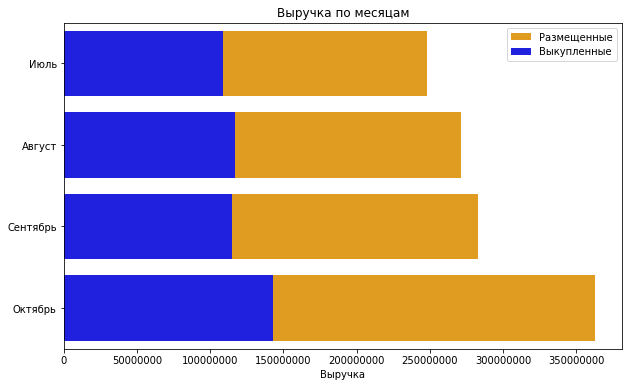

In [416]:
visualize_stat(month_posted, month_purchased, 'Выручка', 'Выручка по месяцам')

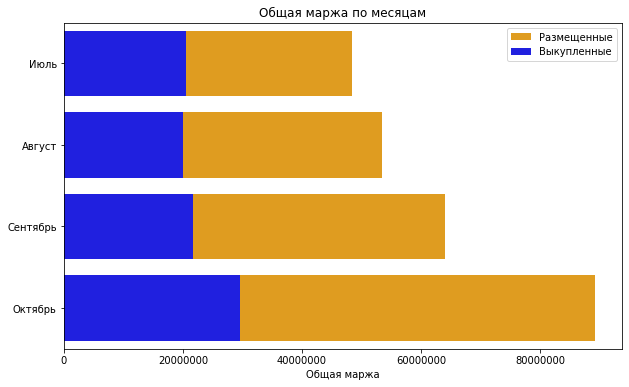

In [417]:
visualize_stat(month_posted, month_purchased, 'Общая маржа', 'Общая маржа по месяцам')

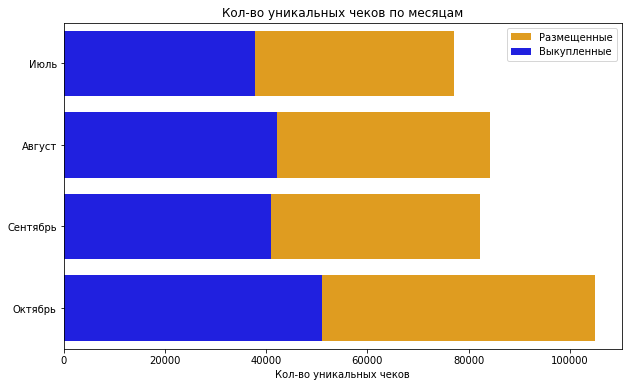

In [418]:
visualize_stat(month_posted, month_purchased,
               'Кол-во уникальных чеков', 'Кол-во уникальных чеков по месяцам')

### Основные показатели по дням недели ###

In [180]:
DAYS_OF_WEEK = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

In [259]:
def get_basic_indicators_by_days(data, is_purchased=False):
    result = pd.DataFrame(columns=KEY_INDICATORS)
    
    for day_of_week in range(1, 8):
        day_of_week_data = data[data['ДеньДатыЗаказа'] == day_of_week]
        result = result.append(get_basic_indicators(day_of_week_data, is_purchased), ignore_index=True)
    
    result.index = DAYS_OF_WEEK
    return result

#### Размещенные товары ####

In [260]:
day_posted = get_basic_indicators_by_days(order_data)
day_posted

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
Понедельник,169970119,3321.55,51172,36380843,292819,5.72,580.46,710.95,21.40
Вторник,207068950,3195.36,64803,43348530,352314,5.44,587.74,668.93,20.93
Среда,190849370,3295.22,57917,40649338,325442,5.62,586.43,701.86,21.30
Четверг,179097320,3321.85,53915,39495451,287474,5.33,623.00,732.55,22.05
Пятница,148606910,3368.93,44111,34378605,233015,5.28,637.76,779.37,23.13
Суббота,122854831,3510.94,34992,27469587,177569,5.07,691.87,785.02,22.36
Воскресенье,146130198,3495.69,41803,33395652,215721,5.16,677.40,798.88,22.85


#### Выкупленные товары ####

In [261]:
day_purchased = get_basic_indicators_by_days(purchased_data, is_purchased=True)
day_purchased

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
Понедельник,71521120,2855.82,25044,13386853,119115,4.76,600.44,534.53,18.72
Вторник,87539442,2668.64,32803,15857080,151398,4.62,578.21,483.40,18.11
Среда,77843076,2716.18,28659,14291293,135141,4.72,576.01,498.67,18.36
Четверг,72453001,2746.51,26380,13799003,119893,4.54,604.31,523.09,19.05
Пятница,58704425,2789.07,21048,11491501,95445,4.53,615.06,545.97,19.58
Суббота,50917391,2992.15,17017,10006726,72467,4.26,702.63,588.04,19.65
Воскресенье,63695128,3031.66,21010,12884067,90584,4.31,703.16,613.24,20.23


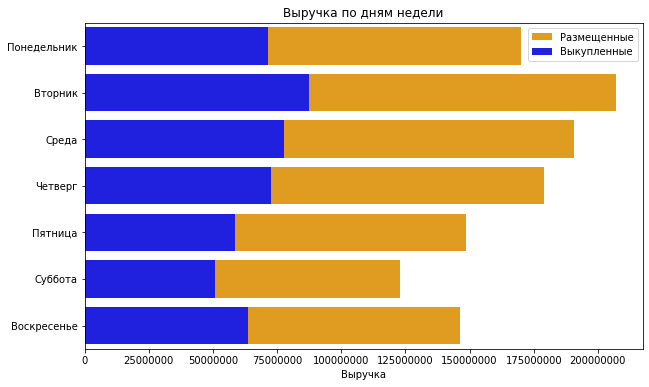

In [419]:
visualize_stat(day_posted, day_purchased, 'Выручка', 'Выручка по дням недели')

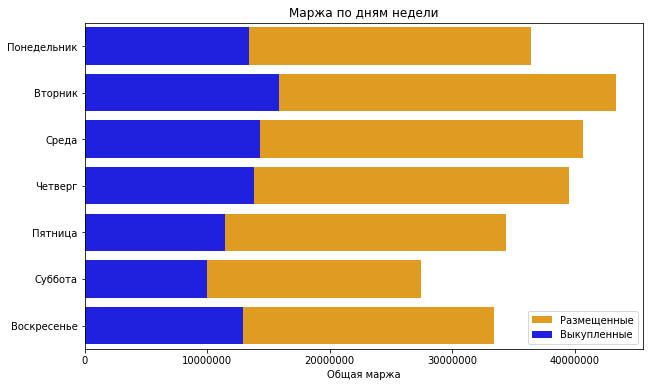

In [420]:
visualize_stat(day_posted, day_purchased, 'Общая маржа', 'Маржа по дням недели')

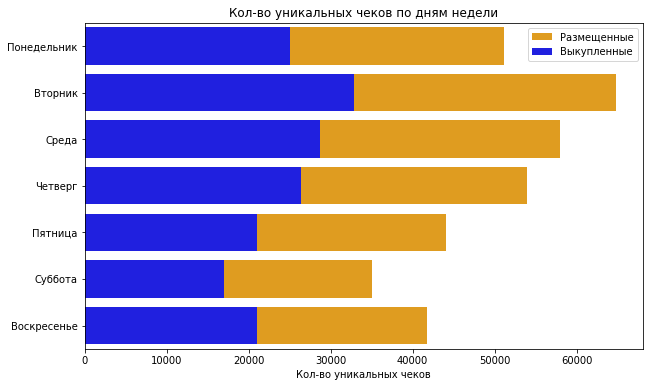

In [421]:
visualize_stat(day_posted, day_purchased, 'Кол-во уникальных чеков', 'Кол-во уникальных чеков по дням недели')

### Основные показатели по часам ###

In [262]:
def get_basic_indicators_by_hours(data, is_purchased=False):
    result = pd.DataFrame(columns=KEY_INDICATORS)
    
    for hour in range(24):
        hour_data = data[data['ЧасДатыЗаказа'] == hour]
        result = result.append(get_basic_indicators(hour_data, is_purchased), ignore_index=True)
    
    return result

#### Размещенные товары ####

In [263]:
hour_posted = get_basic_indicators_by_hours(order_data)
hour_posted

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
0,16745913,3230.93,5183,3791001,26641,5.14,628.58,731.43,22.64
1,118787,3712.09,32,23771,331,10.34,358.87,742.85,20.01
2,52879478,3143.66,16821,11780626,91995,5.47,574.81,700.35,22.28
3,5421987,3388.74,1600,1167475,9574,5.98,566.32,729.67,21.53
4,2197909,2888.19,761,489958,4015,5.28,547.42,643.84,22.29
5,2866367,3227.89,888,625326,4450,5.01,644.13,704.20,21.82
6,5464161,3111.71,1756,1198681,7504,4.27,728.17,682.62,21.94
7,10435121,3099.23,3367,2217520,13955,4.14,747.77,658.60,21.25
8,16728104,3191.17,5242,3630535,20729,3.95,806.99,692.59,21.70
9,34425117,3063.28,11238,7785775,49772,4.43,691.66,692.81,22.62


#### Выкупленные товары ####

In [264]:
hour_purchased = get_basic_indicators_by_hours(purchased_data, is_purchased=True)
hour_purchased

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
0,8770492,2782.52,3152,1644648,15074,4.78,581.83,521.78,18.75
1,19262,2140.22,9,2653,66,7.33,291.85,294.84,13.78
2,26137608,2655.99,9841,4746033,52587,5.34,497.04,482.27,18.16
3,2529358,2917.37,867,452404,5431,6.26,465.73,521.80,17.89
4,1092497,2613.63,418,187900,2070,4.95,527.78,449.52,17.20
5,1557308,3053.55,510,301127,2346,4.60,663.81,590.45,19.34
6,3029201,2884.95,1050,553813,4529,4.31,668.85,527.44,18.28
7,5874006,2855.62,2057,1097657,8654,4.21,678.76,533.62,18.69
8,9012867,2855.79,3156,1687270,12018,3.81,749.95,534.62,18.72
9,17155547,2654.84,6462,3258666,27306,4.23,628.27,504.28,18.99


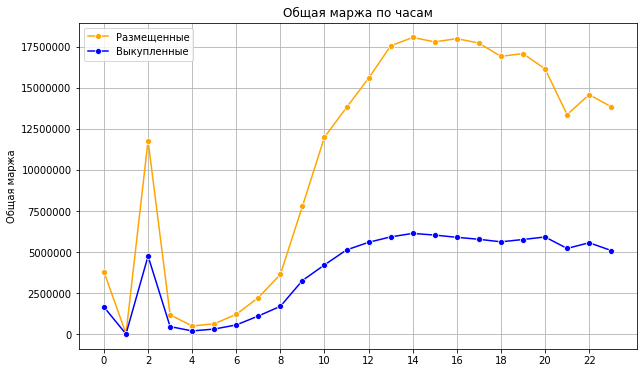

In [412]:
ax = plt.subplots(figsize=(10, 6));

ax = sns.lineplot(x=list(hour_posted.index), y=hour_posted['Общая маржа'].apply(pd.to_numeric),
                     color='orange', label='Размещенные', marker='o');
ax = sns.lineplot(x=list(hour_posted.index), y=hour_purchased['Общая маржа'].apply(pd.to_numeric),
                     color='blue', label='Выкупленные', marker='o');

ax.set_xticks(range(0, len(hour_posted.index), 2))
ax.set_xticklabels(list(hour_posted.index)[::2])
ax.ticklabel_format(style='plain', axis='y')
plt.title('Общая маржа по часам')
plt.legend()
plt.grid()
plt.show();

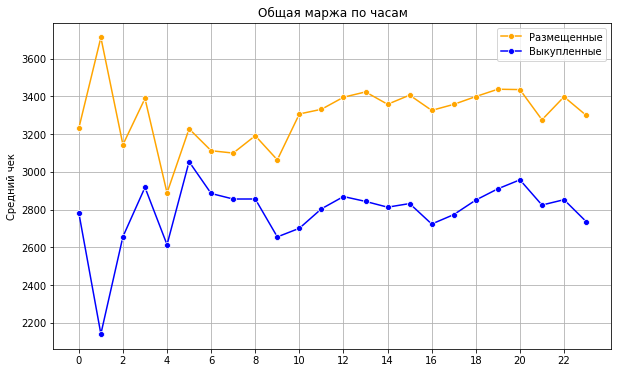

In [411]:
ax = plt.subplots(figsize=(10, 6));

ax = sns.lineplot(x=list(hour_posted.index), y=hour_posted['Средний чек'].apply(pd.to_numeric),
                     color='orange', label='Размещенные', marker='o');
ax = sns.lineplot(x=list(hour_posted.index), y=hour_purchased['Средний чек'].apply(pd.to_numeric),
                     color='blue', label='Выкупленные', marker='o');

ax.set_xticks(range(0, len(hour_posted.index), 2))
ax.set_xticklabels(list(hour_posted.index)[::2])
plt.title('Средний чек по часам')
plt.legend()
plt.grid()
plt.show();

### Основные показатели по регионам ###

In [273]:
DISTRICTS = list(order_data['Регион'].unique())

def get_basic_indicators_by_region(data, is_purchased=False):
    result = pd.DataFrame(columns=KEY_INDICATORS)
    
    region_list = DISTRICTS
    for region in region_list:
        region_data = data[data['Регион'] == region]
        result = result.append(get_basic_indicators(region_data, is_purchased), ignore_index=True)
        
    result.index = DISTRICTS
    return result

#### Размещенные товары ####

In [274]:
region_posted = get_basic_indicators_by_region(order_data)
region_posted

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
NORTH,90199129,3045.31,29619,19835208,128593,4.34,701.43,669.68,21.99
SOUTHERN,73191996,3610.14,20274,16152977,87716,4.33,834.42,796.73,22.07
CENTRAL,714159494,3315.60,215394,155535830,1321314,6.13,540.49,722.10,21.78
PRIVOLZIE,143832559,3252.58,44221,31491601,176159,3.98,816.49,712.14,21.89
URAL,69325970,3787.27,18305,15781748,72961,3.99,950.18,862.16,22.76
SIBERIA,67629524,3485.70,19402,15196147,78582,4.05,860.62,783.23,22.47
FAR EAST,6239026,4164.90,1498,1124496,19029,12.70,327.87,750.67,18.02


#### Выкупленные товары ####

In [446]:
region_purchased.index.tolist()

['NORTH', 'SOUTHERN', 'CENTRAL', 'PRIVOLZIE', 'URAL', 'SIBERIA', 'FAR EAST']

In [275]:
region_purchased = get_basic_indicators_by_region(purchased_data, is_purchased=True)
region_purchased

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
NORTH,46292991,2853.36,16224,8731268,75127,4.63,616.20,538.17,18.86
SOUTHERN,36959016,3369.41,10969,7408127,46142,4.21,800.98,675.37,20.04
CENTRAL,247627489,2522.74,98158,46027657,456077,4.65,542.95,468.91,18.59
PRIVOLZIE,77787510,3043.69,25557,14906515,109045,4.27,713.35,583.27,19.16
URAL,36021207,3558.35,10123,7165832,43428,4.29,829.45,707.88,19.89
SIBERIA,35215369,3443.71,10226,7058667,44161,4.32,797.43,690.27,20.04
FAR EAST,2770001,3934.66,704,418456,10063,14.29,275.27,594.40,15.11


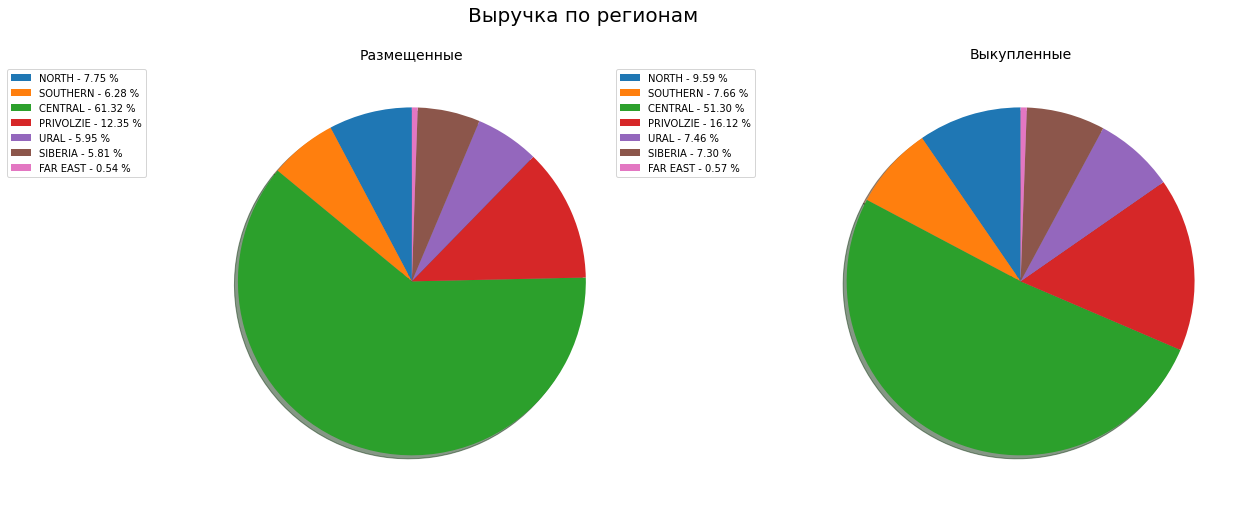

In [442]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
percents = region_posted['Выручка'] / region_posted['Выручка'].sum() * 100
legend = ['{0} - {1:1.2f} %'.format(l, p) for l, p in zip(DISTRICTS, percents)]

axs[0].pie(region_posted['Выручка'], shadow=True, startangle=90)
axs[0].set_title('Размещенные', fontsize=14)
axs[0].legend(legend, loc='best',
              bbox_to_anchor=(-0.1, 1.))

percents = region_purchased['Выручка'] / region_purchased['Выручка'].sum() * 100
legend = ['{0} - {1:1.2f} %'.format(l, p) for l, p in zip(DISTRICTS, percents)]

axs[1].pie(region_purchased['Выручка'], shadow=True, startangle=90)
axs[1].set_title('Выкупленные', fontsize=14)
axs[1].legend(legend, loc='best',
              bbox_to_anchor=(-0.1, 1.))

plt.suptitle('Выручка по регионам', horizontalalignment='right', fontsize=20)
plt.show()

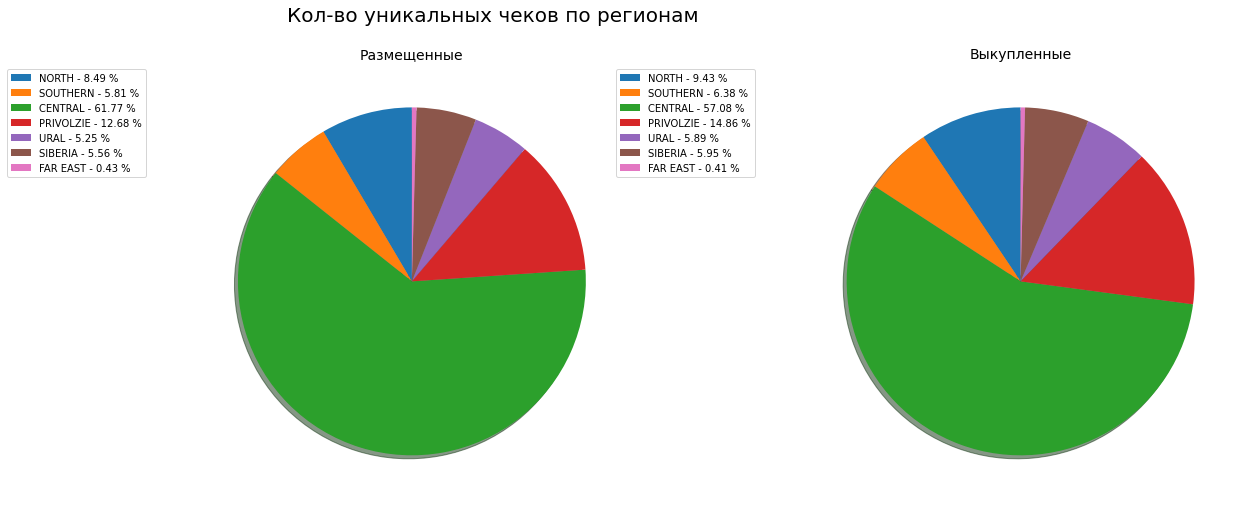

In [445]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
percents = region_posted['Кол-во уникальных чеков'] / region_posted['Кол-во уникальных чеков'].sum() * 100
legend = ['{0} - {1:1.2f} %'.format(l, p) for l, p in zip(DISTRICTS, percents)]

axs[0].pie(region_posted['Кол-во уникальных чеков'], shadow=True, startangle=90)
axs[0].set_title('Размещенные', fontsize=14)
axs[0].legend(legend, loc='best',
              bbox_to_anchor=(-0.1, 1.))

percents = region_purchased['Кол-во уникальных чеков'] / region_purchased['Кол-во уникальных чеков'].sum() * 100
legend = ['{0} - {1:1.2f} %'.format(l, p) for l, p in zip(DISTRICTS, percents)]

axs[1].pie(region_purchased['Кол-во уникальных чеков'], shadow=True, startangle=90)
axs[1].set_title('Выкупленные', fontsize=14)
axs[1].legend(legend, loc='best',
              bbox_to_anchor=(-0.1, 1.))

plt.suptitle('Кол-во уникальных чеков по регионам', horizontalalignment='right', fontsize=20)
plt.show()

### Основные показатели по типам (1 уровень) товаров ###

In [312]:
def get_basic_indicators_by_type(data, is_purchased=False):
    result = pd.DataFrame(columns=KEY_INDICATORS)
    
    good_types = sorted(data['Тип'].unique())
    for good_type in good_types:
        type_data = data[data['Тип'] == good_type]
        result = result.append(get_basic_indicators(type_data, is_purchased), ignore_index=True)
        
    result.index = good_types
    return result

#### Размещенные товары ####

In [313]:
type_posted = get_basic_indicators_by_type(order_data)
type_posted

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
ИГРУШКИ,199259842,1672.26,119156,40991073,370299,3.11,538.11,344.01,20.57
ИНОЕ,11916292,1365.45,8727,1201666,61482,7.05,193.82,137.70,10.08
КГТ,312171453,6211.38,50258,79750559,58333,1.16,5351.54,1586.82,25.55
ОДЕЖДА,336536685,2890.07,116446,110783710,337945,2.90,995.83,951.37,32.92
ППКП,304693426,2231.25,136557,22391000,1056295,7.74,288.45,163.97,7.35


#### Выкупленные товары ####

In [314]:
type_purchased = get_basic_indicators_by_type(purchased_data, is_purchased=True)
type_purchased

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
ИГРУШКИ,93304840,1569.41,59452,18080215,172141,2.90,542.03,304.11,19.38
ИНОЕ,6239490,1434.37,4350,513832,28532,6.56,218.68,118.12,8.24
КГТ,144274031,6450.31,22367,35679459,26902,1.20,5362.95,1595.18,24.73
ОДЕЖДА,93260903,1971.36,47308,27604714,121399,2.57,768.22,583.51,29.60
ППКП,145594321,2028.34,71780,9838304,435069,6.06,334.65,137.06,6.76


### Основные показатели по типам (2 уровень) товаров ###

In [315]:
def get_basic_indicators_by_group2(data, is_purchased=False):
    result = pd.DataFrame(columns=KEY_INDICATORS)
    
    good_types = sorted(data['Группа2'].unique())
    for good_type in good_types:
        type_data = data[data['Группа2'] == good_type]
        result = result.append(get_basic_indicators(type_data, is_purchased), ignore_index=True)
        
    result.index = good_types
    return result

#### Размещенные товары ####

In [316]:
group_2_posted = get_basic_indicators_by_group2(order_data)
group_2_posted

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
ДЕТСКОЕ ПИТАНИЕ,88334059,1930.84,45749,4823287,654400,14.30,134.98,105.43,5.46
ЖЕНСКИЕ ШТУЧКИ,367743,257.70,1427,161180,4255,2.98,86.43,112.95,43.83
ИГРУШКИ,179446721,1658.30,108211,35408922,263585,2.44,680.79,327.22,19.73
"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",19813120,979.73,20223,5582150,106714,5.28,185.67,276.03,28.17
КОСМЕТИКА/ГИГИЕНА,31165332,736.42,42320,4853695,163171,3.86,191.00,114.69,15.57
КРУПНОГАБАРИТНЫЙ ТОВАР,312171453,6211.38,50258,79750559,58333,1.16,5351.54,1586.82,25.55
ОБУВЬ,74161859,2132.74,34773,21766198,62634,1.80,1184.05,625.95,29.35
ПОДГУЗНИКИ,146797858,1910.93,76820,6610071,161455,2.10,909.22,86.05,4.50
СОПУТСТВУЮЩИЕ ТОВАРЫ,609564,371.46,1641,211032,2479,1.51,245.89,128.60,34.62
"ТЕКСТИЛЬ, ТРИКОТАЖ",262374826,2897.09,90565,89017512,275311,3.04,953.01,982.91,33.93


#### Выкупленные товары ####

In [317]:
group_2_purchased = get_basic_indicators_by_group2(purchased_data, is_purchased=True)
group_2_purchased

,Выручка,Средний чек,Кол-во уникальных чеков,Общая маржа,Кол-во товаров,Среднее кол-во товаров в чеке,Средняя цена товара,Средняя маржа с чека,Средний % маржи с чека
ДЕТСКОЕ ПИТАНИЕ,36737417,1826.28,20116,1687866,244746,12.17,150.10,83.91,4.59
ЖЕНСКИЕ ШТУЧКИ,123999,238.00,521,49674,1599,3.07,77.55,95.34,40.06
ИГРУШКИ,85131488,1570.46,54208,15807680,126068,2.33,675.28,291.61,18.57
"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",8173352,900.94,9072,2272535,46073,5.08,177.40,250.50,27.80
КОСМЕТИКА/ГИГИЕНА,13493015,677.84,19906,2003918,67435,3.39,200.09,100.67,14.85
КРУПНОГАБАРИТНЫЙ ТОВАР,144274031,6450.31,22367,35679459,26902,1.20,5362.95,1595.18,24.73
ОБУВЬ,18590868,1510.47,12308,4677433,17870,1.45,1040.34,380.03,25.16
ПОДГУЗНИКИ,77990989,1875.41,41586,3550740,87240,2.10,893.98,85.38,4.55
СОПУТСТВУЮЩИЕ ТОВАРЫ,228276,381.73,598,72283,831,1.39,274.70,120.88,31.66
"ТЕКСТИЛЬ, ТРИКОТАЖ",74670035,1979.06,37730,22927280,103529,2.74,721.25,607.67,30.70


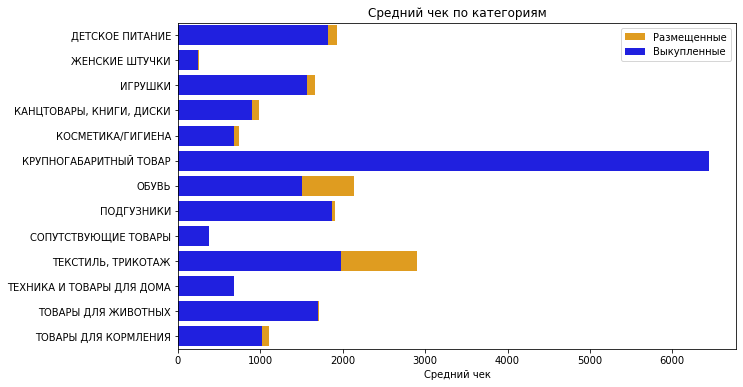

In [422]:
visualize_stat(group_2_posted, group_2_purchased,
               'Средний чек', 'Средний чек по категориям')

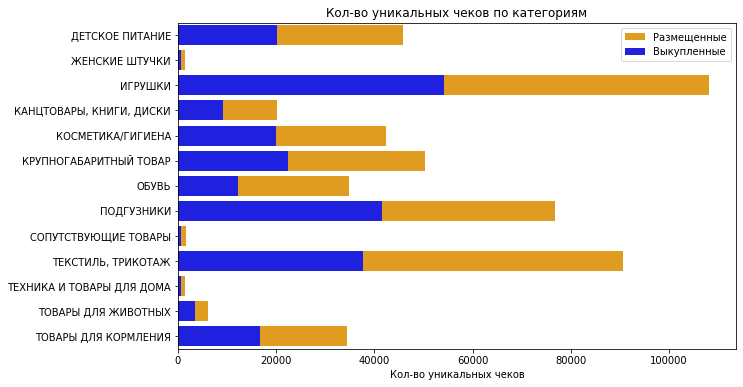

In [423]:
visualize_stat(group_2_posted, group_2_purchased,
               'Кол-во уникальных чеков',
               'Кол-во уникальных чеков по категориям')

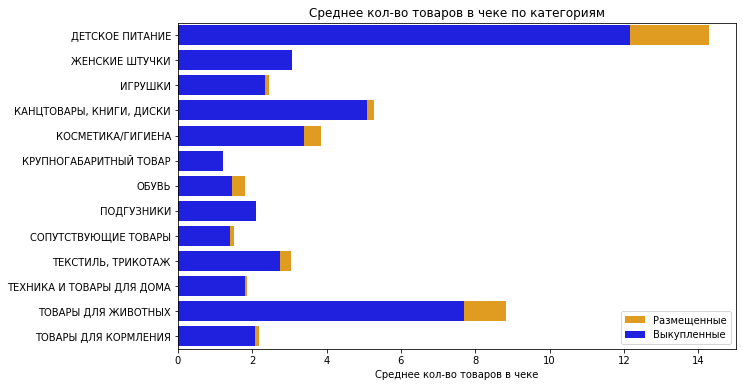

In [425]:
visualize_stat(group_2_posted, group_2_purchased,
               'Среднее кол-во товаров в чеке',
               'Среднее кол-во товаров в чеке по категориям')

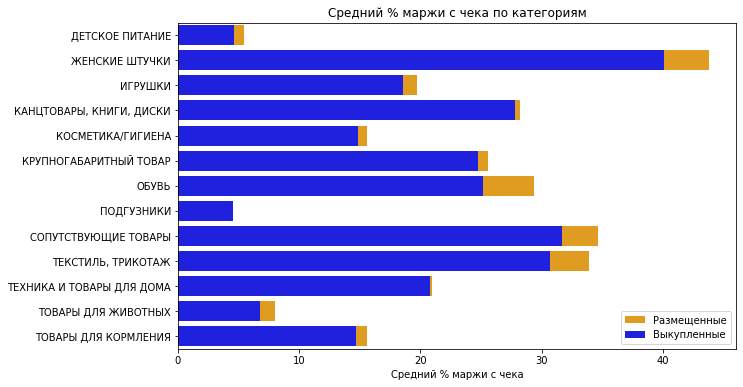

In [426]:
visualize_stat(group_2_posted, group_2_purchased,
               'Средний % маржи с чека',
               'Средний % маржи с чека по категориям')

In [326]:
order_data.to_csv('./data/clean.csv')